In [1473]:
import numpy as np
import matplotlib.pyplot as plt
import math

## First, we will create the noisy data and plot it with the target function (f(x) = x^2)

In [1474]:
N = 5
d = 2
sigma = 0.1
lambda_vals = [0, 0.00001, 0.001, 1]

In [1475]:
def get_data(N):
    X = np.random.uniform(-1,1,size=(N)) #get random training points
    X_with_noise = np.add(np.square(X),np.random.normal(0,.1,X.shape))
    return X, X_with_noise

In [1476]:
def plot_f(x_vals,y_vals):
    x = np.arange(-1,1,.01)
    plt.ylim(-.5,1.2)
    plt.xlim(-2,2)
    plt.plot(x,np.square(x), 'r')
    plt.scatter(x_vals,y_vals)
    plt.show()


In [1477]:
x,noisy_x = get_data(N)

**This is our noisy data plotted with the target function**

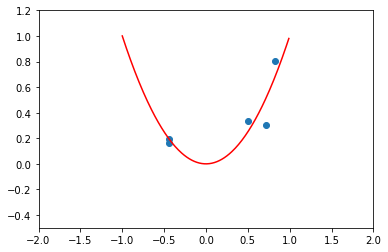

In [1478]:
plot_f(x,noisy_x) 

___
## Now, we will try to fit the data using the nonlinear transform technique

In [1479]:
def transform_data(data):
   return (np.array(list(map(lambda x:[1,x,(1/2) * (3 * (x ** 2) - 1),(1/2) * (5 * (x ** 3) - 3 * x),(1/8) * (35 * (x ** 4) - 30 * (x ** 2) + 3)],data.tolist()))))

In [1480]:
z = transform_data(noisy_x)
z_plot = transform_data(np.arange(-1,1,.01))

In [1481]:
def get_w(z, lam_val, y,N):
    result = np.matmul(np.matmul(np.transpose(z),y),np.linalg.pinv(np.add(np.matmul(np.transpose(z),z),np.multiply(lam_val,np.eye(N)))))
    return result

## Part 1: Regularized regression w/o Cross Validation 

### Part A: LOOCV

In [1482]:
def loocv(lambda_vals,Z,y,N,noisy_data):
    Err_loocv = np.zeros(4)
    ypred_for_lambda = np.zeros(shape=(4,N))
     ## because there are four values of lamda
    for i, value in enumerate(lambda_vals):
        Err_temp = np.zeros(N)
        ypred = np.zeros(N) # used for leave-one-out error
        for ind_val in range(N): # N=5
            ind_train = np.setdiff1d(np.arange(N), ind_val) # all examples but ind_val
            Ztrain = Z[ind_train,:]
            w = get_w(Ztrain, value, y[ind_train], N)
            Zval = Z[ind_val,:]
            ypred[ind_val] = np.dot(w,Zval)
            Err_temp[ind_val] = (ypred[ind_val]-y[ind_val])**2 #sum of squares error #... Save the current validation error in Err_temp[ind_val]
        Err_loocv[i] = np.mean(Err_temp)
        ypred_for_lambda[i,:] = ypred
    return Err_loocv, ypred_for_lambda
    

In [1483]:
def plot(x_vals,y_vals,h, error):
    plt.ylim(-.5,1.2)
    plt.xlim(-2,2)
    x = np.arange(-1,1,.01)
    plt.plot(x,np.square(x))
    plt.plot(x,h,'r')
    plt.scatter(x_vals,y_vals)
    plt.title("The error: %f" % error)
    plt.show()

In [1484]:
Err_array, h_array = loocv(lambda_vals, z_plot, np.arange(-1,1,.01) ** 2, N,noisy_x)
for i, val in enumerate(lambda_vals):
    print("Lambda:", val, "| Err_val:", Err_array[i])

Lambda: 0 | Err_val: 1.5059258645056341e-09
Lambda: 1e-05 | Err_val: 6.780835173359575e-08
Lambda: 0.001 | Err_val: 7.870544959943255e-07
Lambda: 1 | Err_val: 0.00353664788469358


### Part B: Out of sample error for each lambda value

In [1485]:
def plot(x_vals,y_vals,h,error,lam_val):
    x = np.arange(-1,1,.01)
    plt.ylim(-.5,1.2)
    plt.xlim(-2,2)
    plt.plot(x,np.square(x), 'b')
    plt.plot(x,h,'r')
    plt.scatter(x_vals,y_vals)
    plt.title("The error for lambda = %s was %f" % (lam_val,error))
    plt.show()

def find_eout(h,y): #find sum of squares error
    return np.mean(np.square(np.subtract(h,y)))

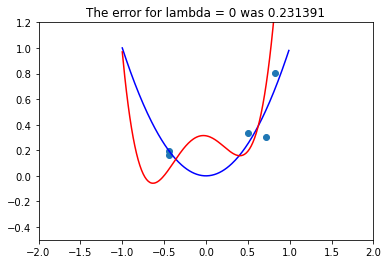

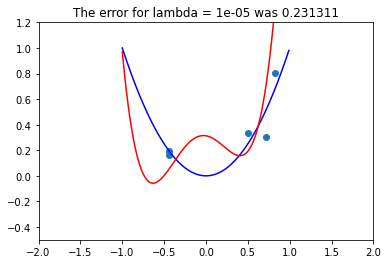

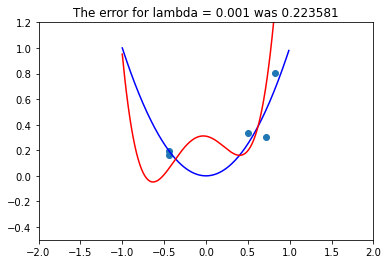

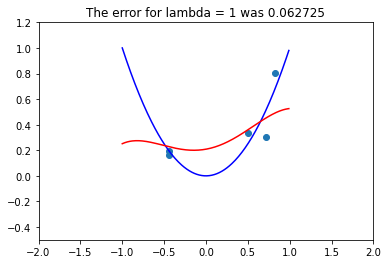

Best error was 0.062725 (lamda = 1)


In [1486]:
x_vals = np.arange(-1,1,.01)

z = transform_data(np.random.uniform(-1,1,5))
z_vals = transform_data(x_vals) #transfor the 2d points to 5d points (1,z1,z2,z3,z4)

best_error = math.inf

for i in lambda_vals:
    w = get_w(z,i,noisy_x,N)
    h = np.dot(z_vals,w)
    if find_eout(h,np.square(x_vals)) < best_error:
        best_error = find_eout(h,np.square(x_vals))
        best_lam = i
    plot(x,noisy_x,h,find_eout(h,np.square(x_vals)),i)
print("Best error was %f (lamda = %s)" % (best_error,best_lam))